 # IDAES-GTEP Tutorial Notebook

 ### Presented & last updated 9/19/24

 This notebook is intended as an introductory tutorial to using the IDAES-GTEP tool.  It walks through loading a small test case (PJM 5-bus) and solves expansion planning models with a few different assumptions on the network.  It demonstrates some basic result visualizations on the investment options and grid operations.

In [27]:
from gtep.gtep_model import ExpansionPlanningModel
from gtep.gtep_data import ExpansionPlanningData
from gtep.gtep_solution import ExpansionPlanningSolution
from pyomo.core import TransformationFactory
from pyomo.contrib.appsi.solvers.highs import Highs
import pdb


 Loads default set of representative days -- #TODO allow non defaults by Tuesday

In [28]:
data_path = "./gtep/data/5bus"
data_object = ExpansionPlanningData()
data_object.load_prescient(data_path)


c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_name,
c:\Users\ragarre\.conda\envs\3mldrd\lib\site-packages\egret\parsers\rts_gmlc\parser.py:254: FutureWarning: Support for nested sequences for 'pars

 Builds expansion planning object but not specific model yet -- #TODO note issues that can occur with num_reps too large.  Also, make config overwrite these periods for the distinct times.

In [29]:
mod_object = ExpansionPlanningModel(
    stages=1,
    data=data_object.md,
    num_reps=1,
    len_reps=1,
    num_commit=2,
    num_dispatch=2,
)


In [30]:
mod_object.create_model()


[    0.00] Creating GTEP Model
(type=<class 'pyomo.core.base.var.ScalarVar'>) on block investmentStage[1]
with a new Component (type=<class
'pyomo.core.base.expression.ScalarExpression'>). This is usually indicative of
a modelling error. To avoid this warning, use block.del_component() and
block.add_component().


In [31]:
TransformationFactory("gdp.bound_pretransformation").apply_to(mod_object.model)
TransformationFactory("gdp.bigm").apply_to(mod_object.model)


Set Highs as solver and solve the model

In [32]:
opt = Highs()
mod_object.results = opt.solve(mod_object.model)


 #TODO -- demonstrate capabilities to save & load solution info

In [33]:
sol_object = ExpansionPlanningSolution()
sol_object.load_from_model(mod_object)
sol_object.dump_json("./gtep/gtep_solution.json")



In [34]:
sol_object.import_data_object(data_object)
### Uncomment to work with saved output file
#sol_object.read_json("./gtep/gtep_solution.json")


Directory already exists: ./gtep/plots/
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from dispatchPeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from dispatchPeriod[2], failed with error list index out of range. Skipping.
[WARNING] discover_level_relationships has encountered an error: Attempted to split out _logical_to_disjunctive, failed with error: "list index out of range". Assigning as axuilary.


d:\Local_Packages\3M LDRD\fork\idaes-gtep\gtep\gtep_solution.py:327: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)


[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from dispatchPeriod[1], failed with error list index out of range. Skipping.
[WARNING] _level_plot_workhorse has encountered an error: Attempted to split out _logical_to_disjunctive from dispatchPeriod[2], failed with error list index out of range. Skipping.
[WARNING] discover_level_relationships has encountered an error: Attempted to split out _logical_to_disjunctive, failed with error: "list index out of range". Assigning as axuilary.


d:\Local_Packages\3M LDRD\fork\idaes-gtep\gtep\gtep_solution.py:327: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.fillna(value=np.nan)


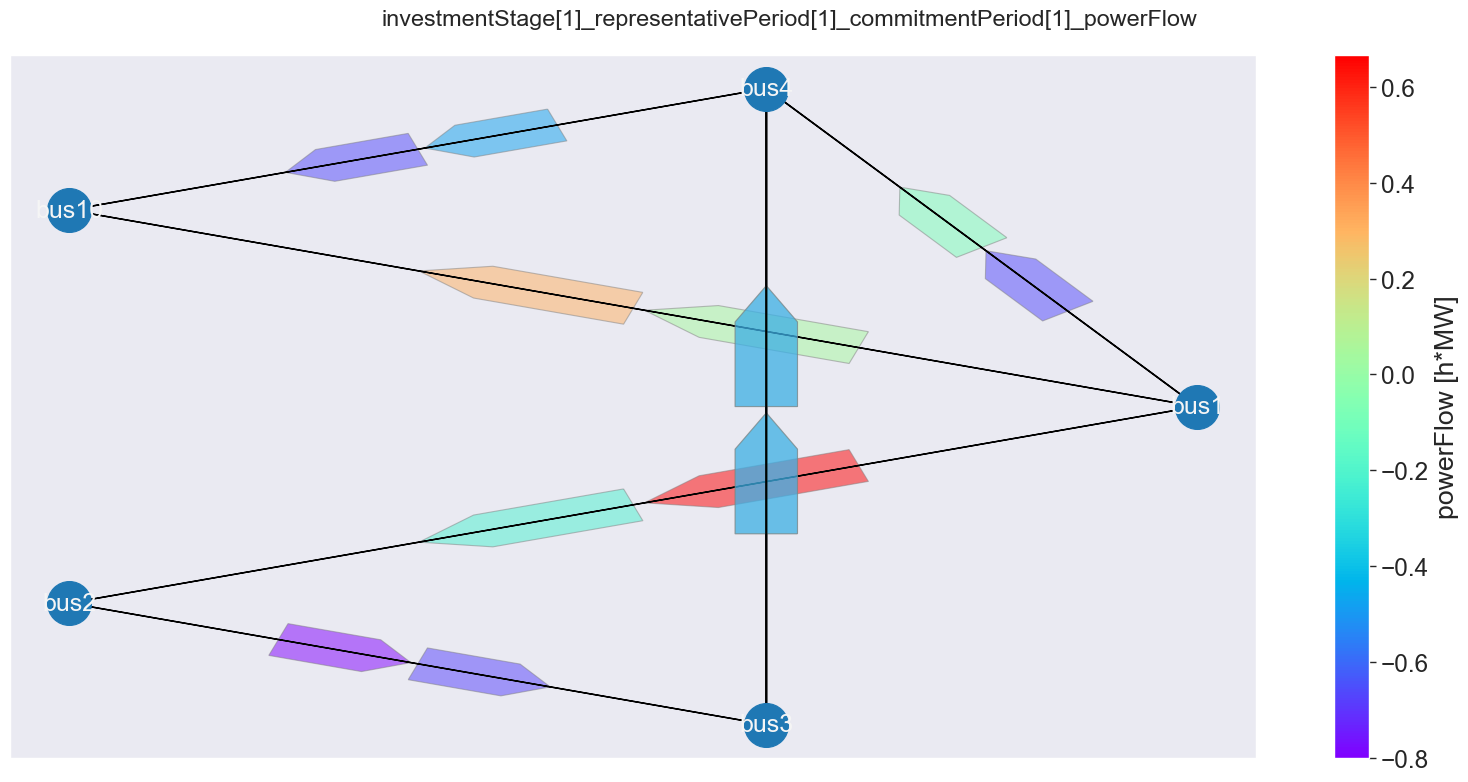

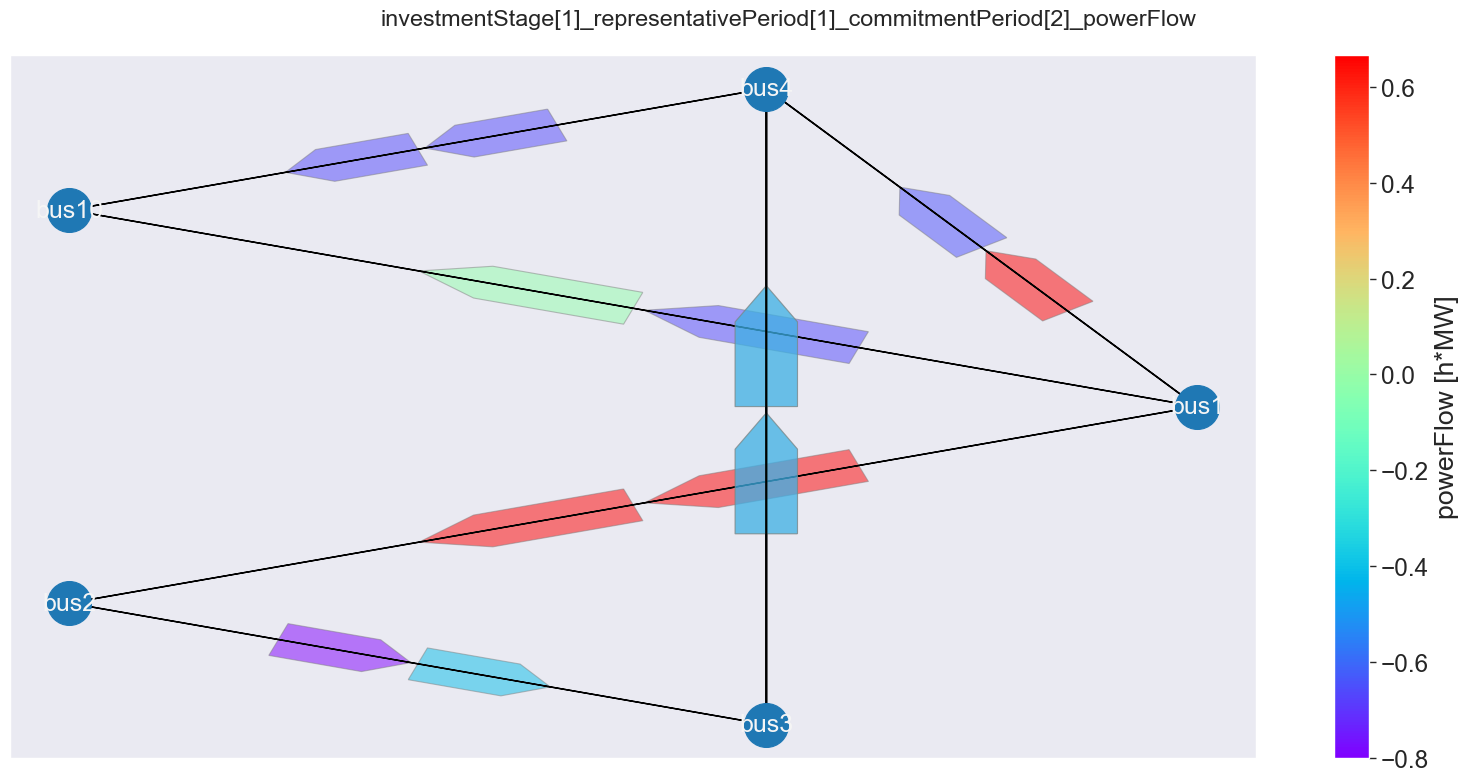

In [35]:
'''
plot_selection: if key = True that object will be plotted

plots from toplevel keys:
'branchChanged':        if branch was disabled, extended, installed, operational, or retired
'genChanged':           if gen was disabled, extended, installed, operational, or retired
'renewableGeneration':  if renewable was extended, installed, or operational

plots from midlevel keys:
'genPowered':           if gen was off, on, shutdown, or startup

plots from bottomlevel keys:
'powerFlow_graph':      networkx plot of power flow: branchInUse, branchNotInUse
'powerFlow':            line plot of power flow: branchInUse, branchNotInUse
'loadShed':             line plot of loadShed
'thermalGeneration':    line plot of quickstartReserve, spinningReserve, thermalGeneration
'renewableGeneration':  line plot of renewableCurtailment, renewableGeneration
'''
plot_selection = {
    'toplevel':     False,
    'midlevel':     False,
    'bottomlevel':  True,    
}

sol_object.plot_levels(save_dir="./gtep/plots/",
                       plot_selection=plot_selection)


